<a href="https://colab.research.google.com/github/jfh5580/jfh5580/blob/main/Bank_Marketing_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Iicense

MIT License

Copyright (c) 2023 jfh5580

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

### DATA PROCESSING

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
bank_data = pd.read_csv('bank-direct-marketing-campaigns.csv')

In [ ]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
bank_data.shape

(41188, 20)

In [ ]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [ ]:
bank_data.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
#Check the null values in each feature
bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
#Frequency of 'y'
# Y stands for the result whether client is likely to subscribe to a term deposit
bank_data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

<Axes: xlabel='y', ylabel='count'>

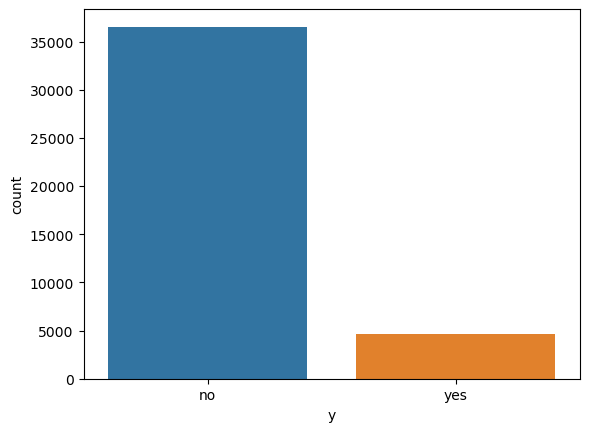

In [ ]:
# Plotting the 'y' frequency
sns.countplot(data=bank_data, x='y')

In [ ]:
#Normalizing the frequency table of 'Subscribed' variable
bank_data['y'].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

From the above analysis we can see that only  4640 people out of 41188 have subscribed which is roughly 11%

#### JOB DESCRIPTION

In [ ]:
#Frequency table
bank_data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

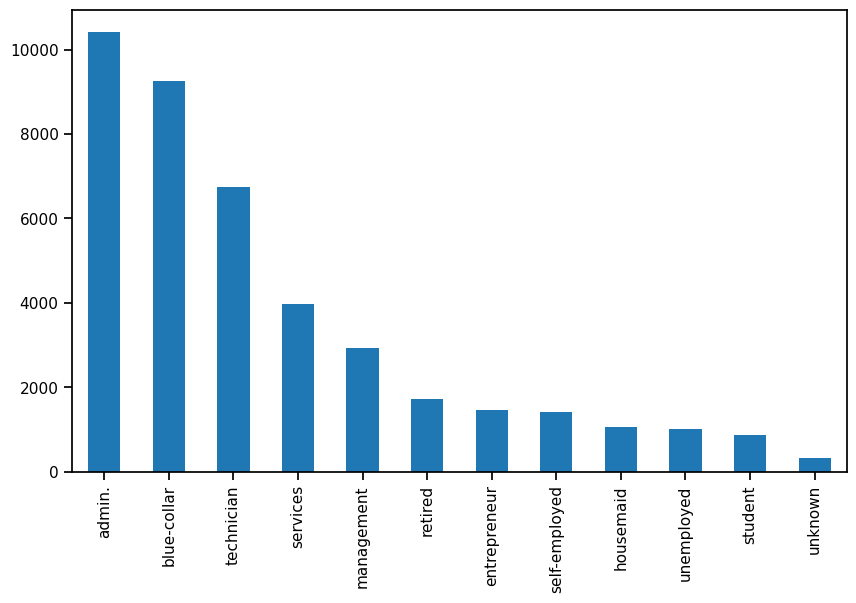

In [ ]:
# Plotting the job frequency table
sns.set_context('notebook')
bank_data['job'].value_counts().plot(kind='bar', figsize=(10,6));

#### Marital Rate

In [ ]:
bank_data['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

<Axes: xlabel='marital', ylabel='count'>

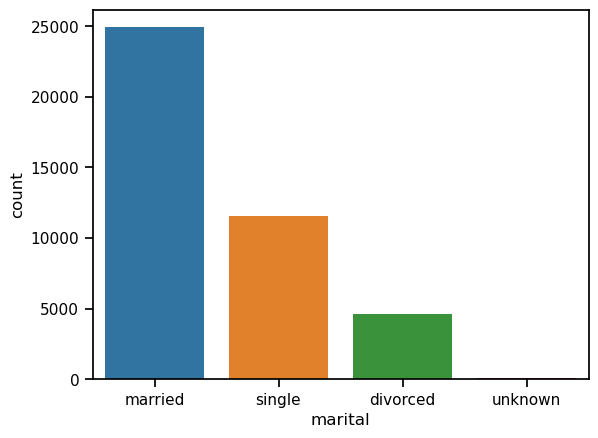

In [ ]:
sns.countplot(data=bank_data, x='marital')

<Axes: xlabel='marital', ylabel='count'>

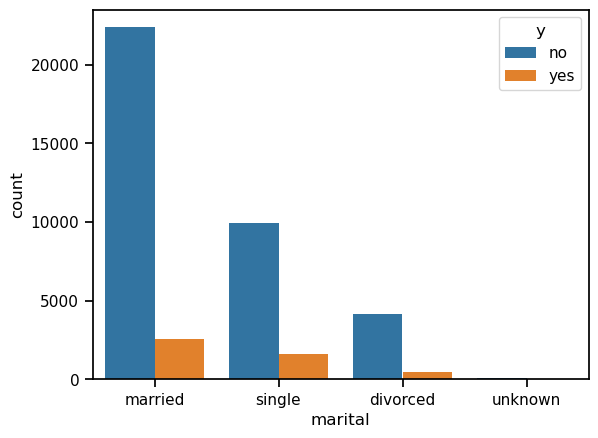

In [ ]:
sns.countplot(data=bank_data, x='marital', hue='y')

#### Education Level

In [ ]:
bank_data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

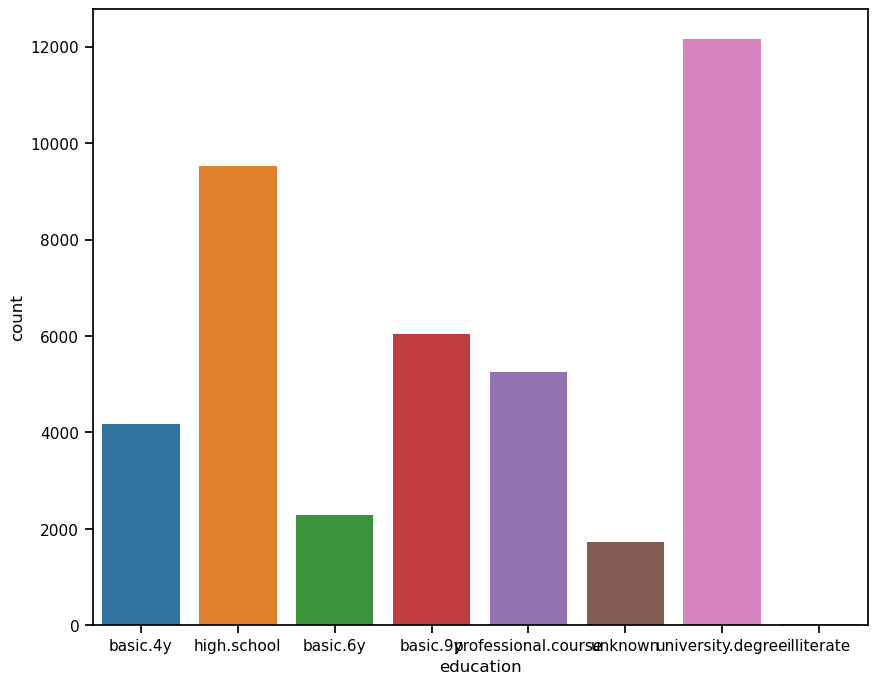

In [ ]:
plt.figure(figsize=(10, 8)) # set the size of the figure
sns.countplot(data=bank_data, x='education') # create the countplot
plt.show()

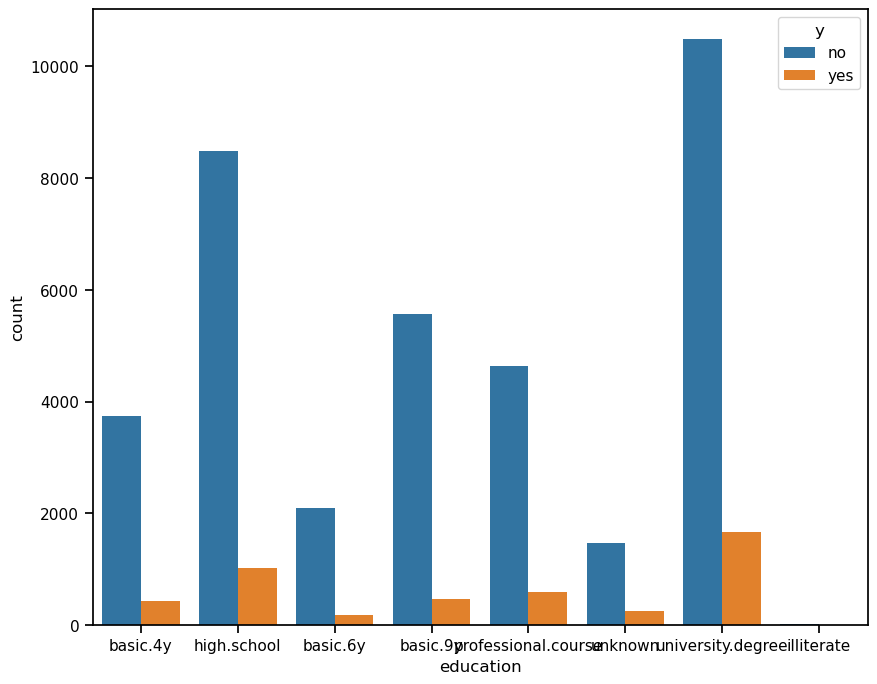

In [ ]:
plt.figure(figsize=(10, 8)) # set the size of the figure
sns.countplot(data=bank_data, x='education', hue = 'y') # create the countplot
plt.show()

Based on the plot, we can assume people who have high degree tend to subscribe to a term deposit.

#### Distribution of Age

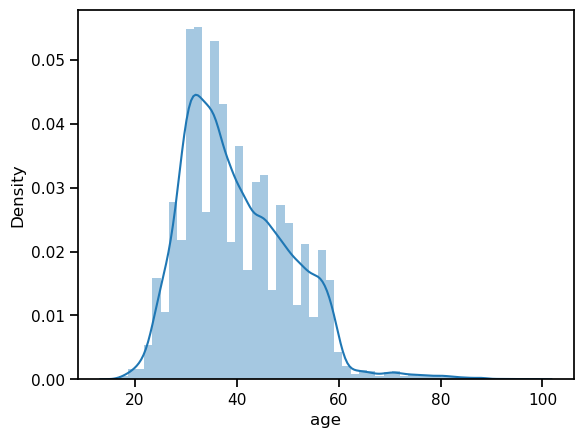

In [ ]:
sns.distplot(bank_data['age']);

In [ ]:
#job vs subscribed
print(pd.crosstab(bank_data['job'],bank_data['y']))

y                no   yes
job                      
admin.         9070  1352
blue-collar    8616   638
entrepreneur   1332   124
housemaid       954   106
management     2596   328
retired        1286   434
self-employed  1272   149
services       3646   323
student         600   275
technician     6013   730
unemployed      870   144
unknown         293    37


In [ ]:
job = pd.crosstab(bank_data['job'],bank_data['y'])
job_norm = job.div(job.sum(1).astype(float), axis=0)

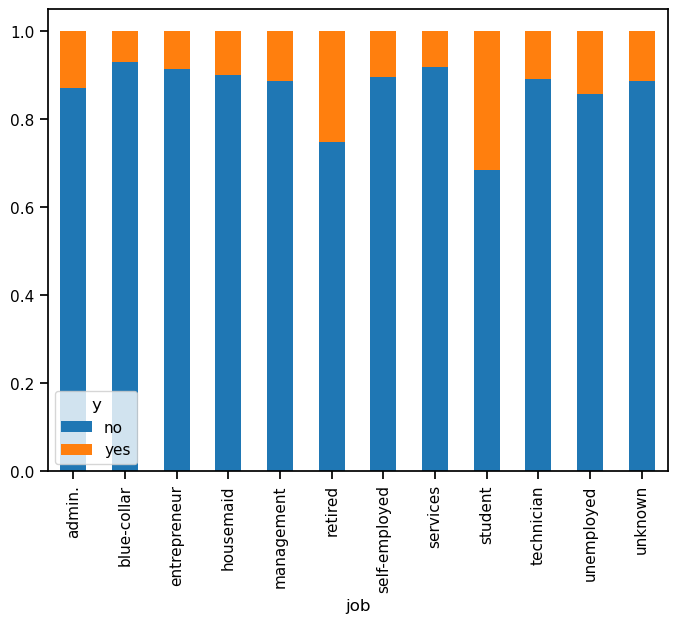

In [ ]:
job_norm.plot.bar(stacked=True,figsize=(8,6));

From the above graph we can infer that students and retired people have higher chances of subscribing to a term deposit, which is surprising as students generally do not subscribe to a term deposit. The possible reason is that the number of students in the dataset is less and comparatively to other job types, more students have subscribed to a term deposit.

In [ ]:
#Marital status vs subscribed
pd.crosstab(bank_data['marital'],bank_data['y'])

y,no,yes
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


In [ ]:
marital = pd.crosstab(bank_data['marital'],bank_data['y'])
marital_norm = marital.div(marital.sum(1).astype(float), axis=0)
marital_norm

y,no,yes
marital,,
divorced,0.896791,0.103209
married,0.898427,0.101573
single,0.859959,0.140041
unknown,0.850000,0.150000


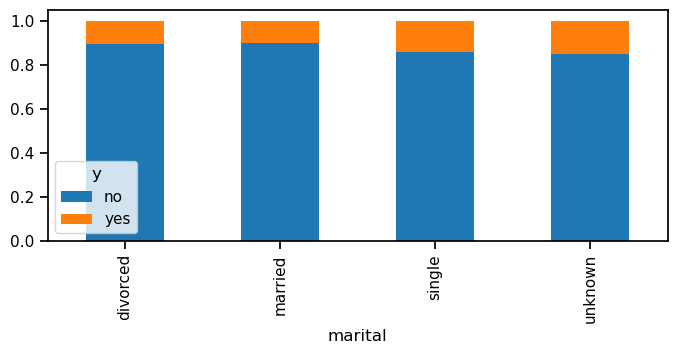

In [ ]:
marital_norm.plot.bar(stacked=True, figsize=(8,3));

In [ ]:
#default vs subscription
pd.crosstab(bank_data['default'], bank_data['y'])

y,no,yes
default,,
no,28391,4197
unknown,8154,443
yes,3,0


In [ ]:
dflt = pd.crosstab(bank_data['default'], bank_data['y'])
dflt_norm = dflt.div(dflt.sum(1).astype(float), axis=0)
dflt_norm

y,no,yes
default,,
no,0.87121,0.12879
unknown,0.94847,0.05153
yes,1.00000,0.00000


<Axes: xlabel='default'>

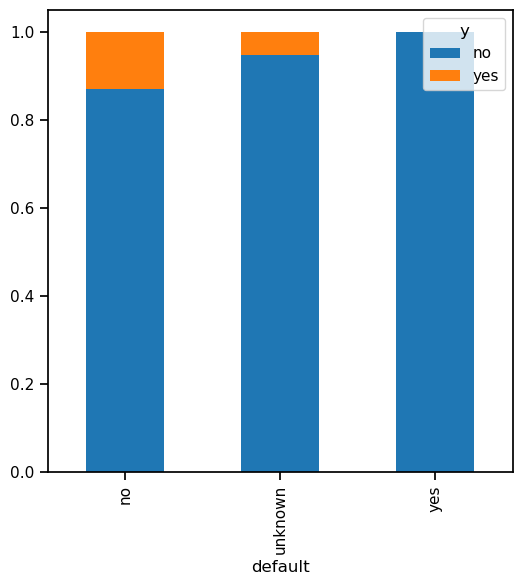

In [ ]:
dflt_norm.plot.bar(stacked=True, figsize=(6,6))

We can infer that clients having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have previous default history.

In [ ]:
# Converting the target variables into 0s and 1s
bank_data['y'].replace('no', 0,inplace=True)
bank_data['y'].replace('yes', 1,inplace=True)

In [ ]:
def label_transform(x):
    le = LabelEncoder()
    Encoded_le = le.fit_transform(x)
    return Encoded_le

In [ ]:
catagoral_label=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
for x in catagoral_label:
    bank_data[x] = label_transform(bank_data[x])

In [ ]:
bank_data.head()# get correlation coefficients with y
corr_with_y = bank_data.corrwith(bank_data['y']).sort_values(ascending=False)

# print the results
print(corr_with_y)


y                 1.000000
previous          0.230181
poutcome          0.129789
education         0.057799
cons.conf.idx     0.054878
marital           0.046203
age               0.030399
job               0.025122
day_of_week       0.015967
housing           0.011552
loan             -0.004909
month            -0.006065
campaign         -0.066357
default          -0.099352
cons.price.idx   -0.136211
contact          -0.144773
emp.var.rate     -0.298334
euribor3m        -0.307771
pdays            -0.324914
nr.employed      -0.354678
dtype: float64


In [ ]:
#Correlation matrix
tc = bank_data.corr()
tc

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.001250,-0.389753,-0.117892,0.164965,-0.001603,-0.007368,0.007021,-0.024877,-0.017572,0.004594,-0.034369,0.024365,0.019750,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
job,0.001250,1.000000,0.027897,0.134121,-0.028277,0.006962,-0.010209,-0.025132,-0.033213,-0.000844,-0.006923,-0.028468,0.020965,0.011504,-0.008271,-0.016017,0.052760,-0.007880,-0.019574,0.025122
marital,-0.389753,0.027897,1.000000,0.109220,-0.079450,0.010467,0.005788,-0.054501,-0.007629,0.002202,-0.007240,-0.037942,0.038689,0.001912,-0.084210,-0.057477,-0.033783,-0.091939,-0.086199,0.046203
education,-0.117892,0.134121,0.109220,1.000000,-0.186859,0.016825,0.006384,-0.105726,-0.082684,-0.017986,0.000371,-0.046626,0.038831,0.017009,-0.043778,-0.081607,0.078799,-0.036380,-0.041492,0.057799
default,0.164965,-0.028277,-0.079450,-0.186859,1.000000,-0.015815,-0.003782,0.135238,-0.015830,-0.008701,0.032825,0.080062,-0.102416,0.023417,0.203263,0.168073,0.026522,0.195336,0.189845,-0.099352
housing,-0.001603,0.006962,0.010467,0.016825,-0.015815,1.000000,0.044296,-0.082186,-0.018141,0.003339,-0.011010,-0.010551,0.021314,-0.011783,-0.060196,-0.080504,-0.033845,-0.059277,-0.045862,0.011552
loan,-0.007368,-0.010209,0.005788,0.006384,-0.003782,0.044296,1.000000,-0.008556,-0.005705,-0.009344,0.005166,0.000345,-0.001327,-0.001511,0.001849,-0.002430,-0.012025,0.000125,0.003903,-0.004909
contact,0.007021,-0.025132,-0.054501,-0.105726,0.135238,-0.082186,-0.008556,1.000000,0.276565,-0.009575,0.077368,0.117970,-0.212848,0.118744,0.393584,0.591474,0.251614,0.399773,0.269155,-0.144773
month,-0.024877,-0.033213,-0.007629,-0.082684,-0.015830,-0.018141,-0.005705,0.276565,1.000000,0.027677,-0.062059,-0.047891,0.103157,-0.065012,-0.178782,-0.004239,0.009652,-0.117264,-0.221425,-0.006065
day_of_week,-0.017572,-0.000844,0.002202,-0.017986,-0.008701,0.003339,-0.009344,-0.009575,0.027677,1.000000,-0.038288,-0.009531,-0.004102,0.018732,0.033245,0.005644,0.041465,0.039043,0.028380,0.015967


In [ ]:
# get correlation coefficients with y
corr_with_y = abs(tc.corrwith(tc['y'])).sort_values(ascending=False)

# print the results
print(corr_with_y)

y                 1.000000
nr.employed       0.725516
euribor3m         0.697444
emp.var.rate      0.685384
pdays             0.679458
previous          0.614101
cons.price.idx    0.560374
contact           0.496236
default           0.360745
campaign          0.261194
education         0.184295
marital           0.159575
month             0.111109
poutcome          0.105647
housing           0.089866
job               0.087269
cons.conf.idx     0.040299
age               0.039238
day_of_week       0.014044
loan              0.003155
dtype: float64


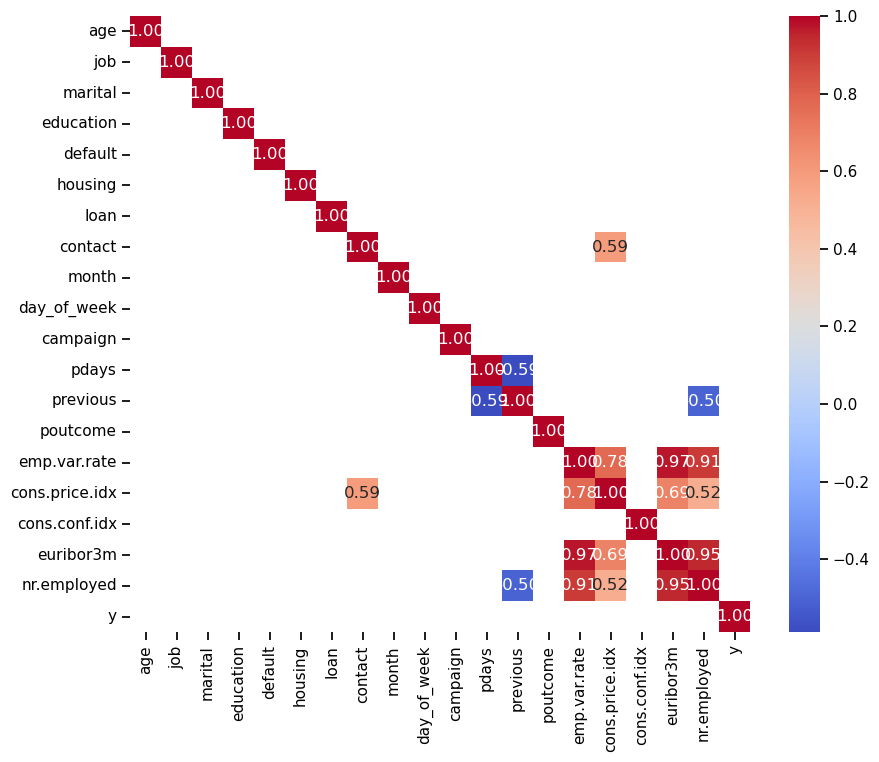

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
corr_threshold = 0.5
sns.heatmap(tc[(tc > corr_threshold) | (tc < -corr_threshold)],
            cmap='coolwarm', annot=True, fmt='.2f', ax=ax)
plt.show()

## Train and test Data

In [ ]:
y = bank_data['y']
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [ ]:
#drop the groud truth column
X = bank_data.drop('y',axis=1)
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,5,1,6,0,2,0,0,7,0,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44,9,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


In [ ]:
from sklearn.model_selection import train_test_split
#split the dataset into 70% training and 30% testing
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.3, random_state = 200)

## Decision Tress

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier(criterion='entropy',random_state=0)
dtc_model=dtc.fit(X_train,y_train)

In [ ]:
# Visualize classification tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
fn = list(X_train.columns) # specify feature names
cn = dtc_model.classes_ # specify class names
print(fn)
print(cn)

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
[0 1]


In [ ]:
### Report the classification tree model's plain accuracy in the test data.
# evaluate in the test data
y_pred=dtc_model.predict(X_test)
print("Plain accuracy of Classification Tree: ",accuracy_score(y_test, y_pred))

Plain accuracy of Classification Tree:  0.8460791454236465


In [ ]:
# check the test instance
X_test.iloc[0]

age                 46.000
job                  9.000
marital              1.000
education            3.000
default              0.000
housing              2.000
loan                 0.000
contact              0.000
month                7.000
day_of_week          1.000
campaign             1.000
pdays              999.000
previous             0.000
poutcome             1.000
emp.var.rate        -0.100
cons.price.idx      93.200
cons.conf.idx      -42.000
euribor3m            4.191
nr.employed       5195.800
Name: 24584, dtype: float64

In [ ]:
# the class probabilies for the first instance in the test data
y_pred1=dtc_model.predict(X_test.iloc[[0]])
print(y_pred1)
# 0 = no

[0]


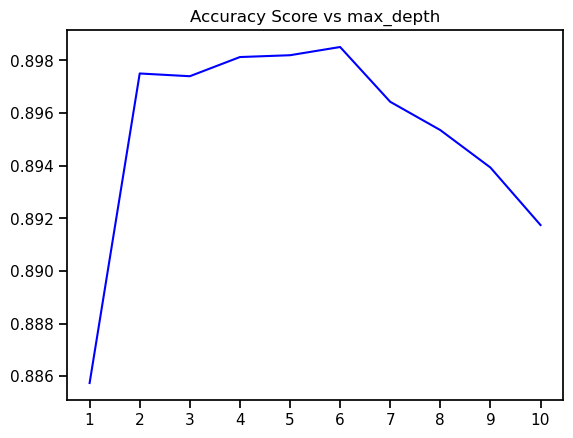

The best max_depth by cross-validation is  6


In [ ]:
# Report the classification tree model's plain accuracy in the test data.
# tune max_depth
scores_list = []
depth_list = np.arange(1,11,1)
for depth in depth_list:
    dtc = DecisionTreeClassifier(max_depth=depth, criterion='entropy',random_state=0)
    model=dtc.fit(X_train,y_train)
    scores = cross_val_score(model,X_train,y_train,cv=10,scoring='accuracy')
    scores_list.append(scores.mean())

plt.plot(depth_list, scores_list,  color = 'blue', markerfacecolor = 'black',label = 'Score')
plt.title('Accuracy Score vs max_depth')
plt.xticks(depth_list)
plt.show()

index = np.argmax(np.array(scores_list))
depth_best = depth_list[index]
print('The best max_depth by cross-validation is ', depth_best)

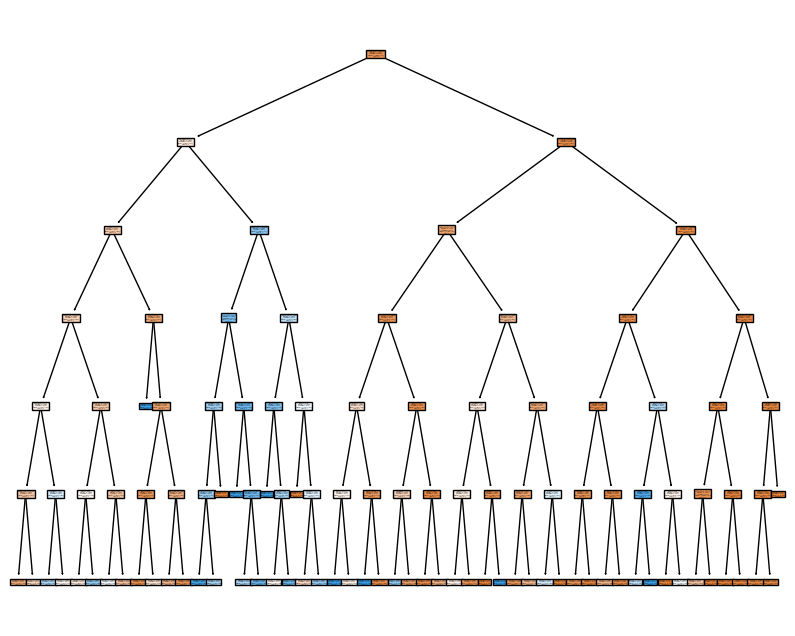

In [ ]:
# set max_depth = 6
dtc = DecisionTreeClassifier(max_depth=6, criterion='entropy',random_state=0)
dtc_model=dtc.fit(X_train,y_train)

# Visualize classification tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
fn = list(X_train.columns) # specify feature names
cn = dtc_model.classes_.astype(str) # convert numpy integers to strings
# specify class names
plt.figure(figsize = (10,8))
plot_tree(dtc_model, feature_names = fn, class_names = cn, filled = True, proportion=True)
plt.savefig("tree.pdf");

In [ ]:
# Pick the first sample in the test data and report its estimated probability

dtc_model.classes_

## 0 == no

## 1 == Yes

array([0, 1])

In [ ]:
# Report this classification tree's plain accuracy in the test data.
# evaluate in the test data
y_pred=dtc_model.predict(X_test)
print("Plain accuracy of Classification Tree: ",accuracy_score(y_test, y_pred))

Plain accuracy of Classification Tree:  0.902889050740471


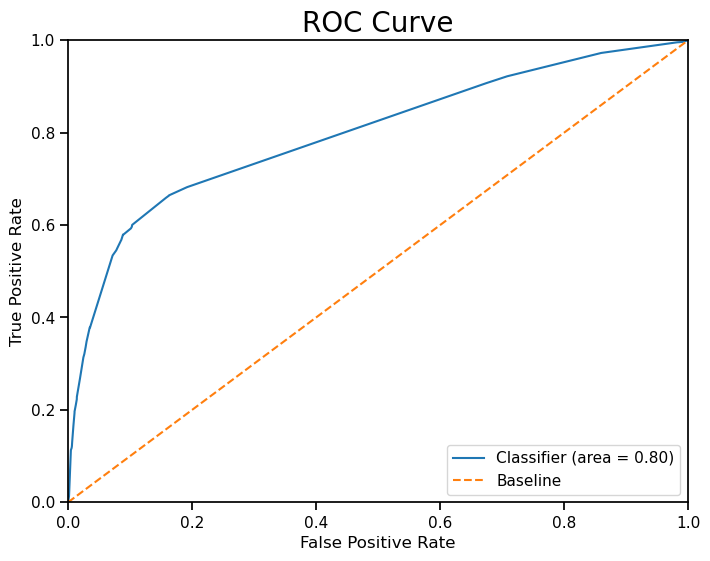

In [ ]:
from sklearn.metrics import auc, roc_auc_score, roc_curve

# Calculate class probabilities, generate ROC curve, and compute AUC
y_proba=dtc_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
classifier_roc_auc = roc_auc_score(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Classifier (area = %0.2f)' % classifier_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Baseline', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve',fontsize = "20")
plt.legend(loc="lower right")
plt.show()

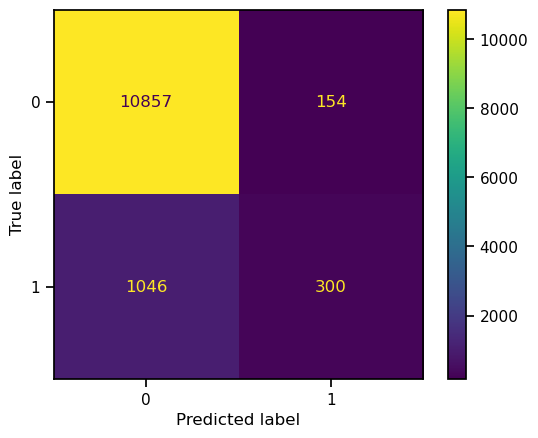

In [ ]:
# Show the confusion matrix of this classification tree in the test data
# Evaluate using the test data
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = dtc_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc.classes_)
disp.plot()
plt.show()


In [ ]:
# Extract TP, FN, FP, TN
TP = cm[1, 1] # True positives (Yes items correctly classified)
FN = cm[0, 1] # False negatives (Yes items incorrectly classified as No)
FP = cm[1, 0] # False positives (No items incorrectly classified as Yes)
TN = cm[0, 0] # True negatives (No items correctly classified)

# Calculate TPR and FPR
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

# Print results
print(f"True positive rate: {TPR:.3f}")
print(f"False positive rate: {FPR:.3f}")

True positive rate: 0.661
False positive rate: 0.088


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# use Logistic Regression to train
model_LR = LogisticRegression(random_state=0).fit(X_train.values, y_train)

# print coefficients and the intercept
print(model_LR.coef_)
print(model_LR.intercept_)

[[ 0.00443995  0.0154622   0.0273103   0.05335215 -0.03155571  0.0018384
  -0.00666042 -0.04690399 -0.07528583  0.0253513  -0.05128065 -0.00157752
  -0.00905763  0.02650421 -0.17349898  0.19443468  0.02422174 -0.19096177
  -0.00338048]]
[0.00214975]


In [ ]:
#predit on the testing set

# Make predictions on the test set
y_pred = model_LR.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate AUC score
y_pred_prob = model_LR.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_prob)

# Print accuracy and AUC score
print("Accuracy:", round(accuracy, 4))
print("AUC score:", round(auc, 4))


Accuracy: 0.9046
AUC score: 0.7744


### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# define logistic regression model
model = LogisticRegression()

# define hyperparameters to search
param_distributions = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga'],
    'max_iter': [100, 200, 500],
    'multi_class': ['ovr', 'multinomial']
}

# perform randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, cv=3, verbose=0, scoring='accuracy', n_iter=50)
random_search.fit(X_train, y_train)

# print best hyperparameters and corresponding score
print('Best hyperparameters:', random_search.best_params_)


Best hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'max_iter': 200, 'C': 1}


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Define the logistic regression model with the best hyperparameters
model_LR = LogisticRegression(C=0.01, penalty='l1', solver='liblinear', multi_class = 'ovr', max_iter = 200, random_state=42)

# Train the model on the training data
model_LR.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = model_LR.predict(X_train)
y_test_pred = model_LR.predict(X_test)

# Calculate the accuracy and AUC for the training and testing predictions
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_auc = roc_auc_score(y_train, model_LR.predict_proba(X_train)[:,1])
test_auc = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:,1])

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)
print("Training AUC:", train_auc)
print("Testing AUC:", test_auc)

Training accuracy: 0.8976795810065554
Testing accuracy: 0.904750343934612
Training AUC: 0.7731963032126985
Testing AUC: 0.7792515130418683


## KNN Model

In [ ]:
#KNN Model
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score

K=1 AUC=0.6256 Accuracy=0.8483
K=2 AUC=0.6740 Accuracy=0.8921
K=3 AUC=0.7004 Accuracy=0.8858
K=4 AUC=0.7199 Accuracy=0.8958
K=5 AUC=0.7351 Accuracy=0.8936
K=6 AUC=0.7435 Accuracy=0.8984
K=7 AUC=0.7474 Accuracy=0.8963
K=8 AUC=0.7506 Accuracy=0.8989
K=9 AUC=0.7544 Accuracy=0.8995
K=10 AUC=0.7568 Accuracy=0.9013
K=11 AUC=0.7576 Accuracy=0.9003
K=12 AUC=0.7608 Accuracy=0.9018
K=13 AUC=0.7638 Accuracy=0.8996
K=14 AUC=0.7654 Accuracy=0.9008
K=15 AUC=0.7645 Accuracy=0.9009
K=16 AUC=0.7653 Accuracy=0.9019
K=17 AUC=0.7659 Accuracy=0.9020
K=18 AUC=0.7667 Accuracy=0.9023
K=19 AUC=0.7682 Accuracy=0.9023
K=20 AUC=0.7699 Accuracy=0.9026
K=21 AUC=0.7698 Accuracy=0.9022
K=22 AUC=0.7701 Accuracy=0.9026
K=23 AUC=0.7708 Accuracy=0.9022
K=24 AUC=0.7718 Accuracy=0.9035
K=25 AUC=0.7741 Accuracy=0.9026
K=26 AUC=0.7755 Accuracy=0.9035
K=27 AUC=0.7757 Accuracy=0.9031
K=28 AUC=0.7758 Accuracy=0.9027
K=29 AUC=0.7753 Accuracy=0.9035
K=30 AUC=0.7755 Accuracy=0.9038
K=31 AUC=0.7761 Accuracy=0.9040
K=32 AUC=0.7762 A

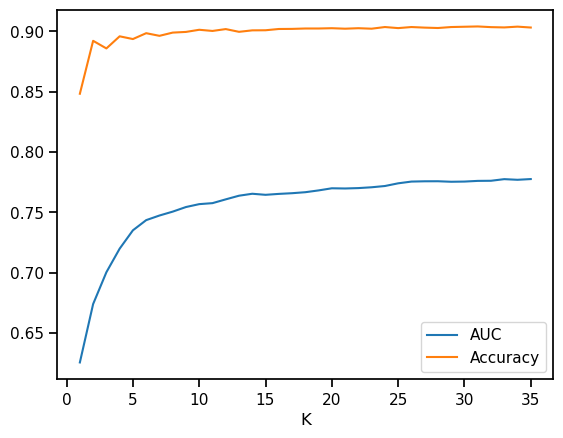

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score

k_range = 35
auc_scores = []
accuracy_scores = []

for k in range(1, k_range+1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_prob = knn.predict_proba(X_test)[:, 1]  # use the test set here
    auc = roc_auc_score(y_test, y_pred_prob)  # evaluate on the test set
    auc_scores.append(auc)
    y_pred = knn.predict(X_test)  # evaluate on the test set
    accuracy = accuracy_score(y_test, y_pred)  # evaluate on the test set
    accuracy_scores.append(accuracy)
    print(f"K={k} AUC={auc:.4f} Accuracy={accuracy:.4f}")

# plot the results
import matplotlib.pyplot as plt
plt.plot(range(1, k_range+1), auc_scores, label="AUC")
plt.plot(range(1, k_range+1), accuracy_scores, label="Accuracy")
plt.xlabel("K")
plt.legend()
plt.show()


Based on the AUC and accuracy scores, we can see that the performance of the KNN classifier improves initially as K increases, but then starts to level off after a certain value of K. The highest AUC score achieved is 0.7776 with K=35 and the highest accuracy score is 0.9040 with K=31.

The choice of K ultimately depends on the specific problem and the importance of accuracy and AUC in the given context. For instance, if identifying true positives is of utmost importance, we would select K that achieves the highest TPR. On the other hand, if identifying true negatives is crucial, we would select K that minimizes FPR.

For this case, we would like to choose the k model depending on the true positive.

In [ ]:
# Train the model with k=35 on the training set
knn_35 = KNeighborsClassifier(n_neighbors=35)
knn_35.fit(X_train, y_train)

# Train the model with k=31 on the training set
knn_31 = KNeighborsClassifier(n_neighbors=31)
knn_31.fit(X_train, y_train)

# Predict the classes for the test set using both models
y_pred_35 = knn_35.predict(X_test)
y_pred_31 = knn_31.predict(X_test)

# Calculate the number of true positives for both models
tp_35 = sum((y_test == 1) & (y_pred_35 == 1))
tp_31 = sum((y_test == 1) & (y_pred_31 == 1))

print(f"True positives for k=35: {tp_35}")
print(f"True positives for k=31: {tp_31}")

True positives for k=35: 289
True positives for k=31: 301


Based on the true positive values, the model with k=31 seems to be better than the model with k=35, since it correctly identified more positive cases.

### SVM

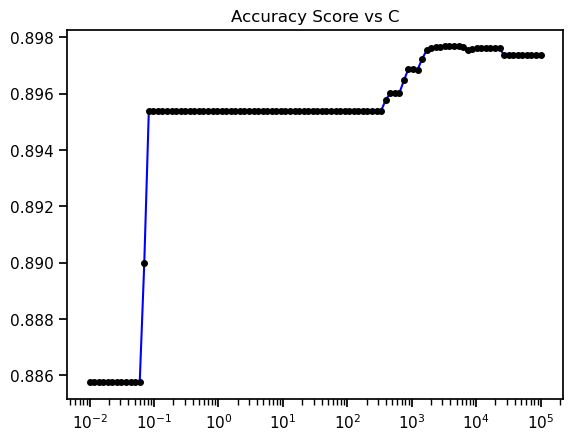

The best C by cross-validation is 3274.549162877725


In [ ]:
from sklearn.svm import SVC


scores_list = []
C_list = np.logspace(-2, 5, 100)
for C_val in C_list:
    model = SVC(kernel='rbf', C=C_val)
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
    scores_list.append(scores.mean())

plt.plot(C_list, scores_list, color='blue', marker='.', markersize=8, markeredgecolor='black', markerfacecolor='black', label='Score')
plt.title('Accuracy Score vs C')
plt.xscale('log')
plt.show()

index = np.argmax(np.array(scores_list))
C_best = C_list[index]
print('The best C by cross-validation is', C_best)


In [ ]:
svm_model = SVC(kernel='rbf', C=C_best,probability=True)

from sklearn.metrics import accuracy_score, roc_auc_score

# Fit the SVM model with the best hyperparameters on the training data
svm_model.fit(X_train, y_train)

# Get predictions on the test data
y_pred = svm_model.predict(X_test)
y_pred_prob = svm_model.predict_proba(X_test)[:, 1]

# Calculate and print the accuracy and AUC score
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_prob)
print('Accuracy:', round(accuracy, 4))
print('AUC:', round(auc_score, 4))

Accuracy: 0.9038
AUC: 0.7859


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
from sklearn.metrics import roc_auc_score

In [ ]:
#Make the Random Forest Classification model
#Origin Setting is 10 decision trees in the random forest
Classif_RF = RandomForestClassifier(n_estimators=10, random_state=0).fit(scale(X_train), y_train)

In [ ]:
Classif_RF.fit(X_train, y_train)
pred = Classif_RF.predict(X_test)
accuracy = accuracy_score(y_test, pred)
auc = roc_auc_score(y_test, pred)
print('random forest accuracy: {:.4f}'.format(accuracy))
print('AUC: {:.4f}'.format(auc))

random forest accuracy: 0.8958
AUC: 0.6213


### Hyperparameter using RandomForestClassifier

In [ ]:
# Number of trees in random forest
n_estimators = [10, 100]
# Number of features to consider at every split
max_features = ['sqrt', 'log2',None]
# Maximum number of levels in tree
max_depth = [6, 8, 10, 12]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [6, 8, 10, 12],
 'max_features': ['sqrt', 'log2', None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 100]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
Classif_RF = RandomForestClassifier(random_state = 0, n_jobs = -1)
# Random search of parameters, using 3 fold cross validation,
Classif_RF_random = GridSearchCV(Classif_RF, param_grid = random_grid, verbose=0,cv = 3, n_jobs = -1)
# Fit the random search model
Classif_RF_random.fit(scale(X_train), y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [6, 8, 10, 12],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 100]})

In [ ]:
print('Optimal Hyperparameter: ', Classif_RF_random.best_params_)
print('Optimal Accuracy: {:.4f}'.format(Classif_RF_random.best_score_))

Optimal Hyperparameter:  {'bootstrap': True, 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Optimal Accuracy: 0.8992


In [ ]:
#To measure the prediction performance on the test set data,
#you can train a new model with the optimal hyperparameters obtained from the hyperparameter tuning process,
#and then evaluate its performance on the test set.
Classif_RF_random_best = RandomForestClassifier(n_estimators= 100,
               max_features = None,
               max_depth = 6,
               min_samples_split=2,
               min_samples_leaf=4,
               bootstrap=True,verbose=0)

Classif_RF_random_best.fit(X_train, y_train)
pred = Classif_RF_random_best.predict(X_test)
auc = roc_auc_score(y_test, pred)
print('Accuracy: {:.4f}'.format(accuracy_score(y_test,pred)))
print('AUC: {:.4f}'.format(auc))

Accuracy: 0.9060
AUC: 0.6231


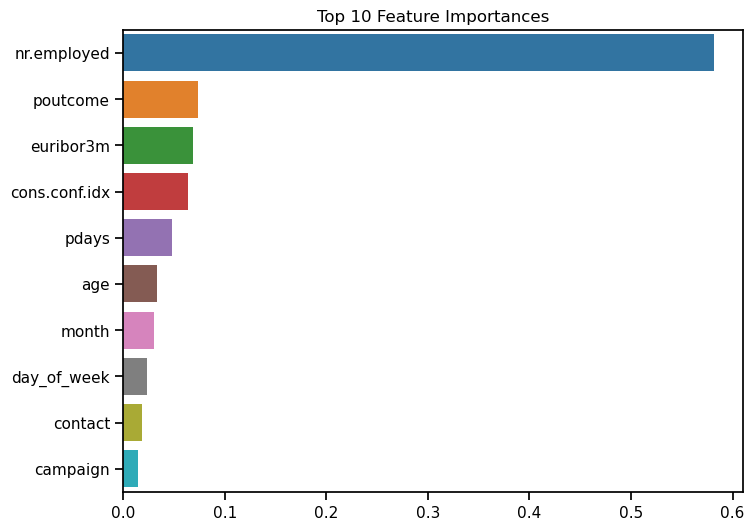

In [ ]:
### Features importance

%matplotlib inline

ftr_importances_values = Classif_RF_random_best.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top10 = ftr_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.title('Top 10 Feature Importances')
sns.barplot(x=ftr_top10, y=ftr_top10.index)
plt.show()

In [ ]:
# Get the feature importance scores
importances = Classif_RF_random_best.feature_importances_

# Print the feature importance scores
for i, importance in enumerate(importances):
    print(f"Feature {i}: {importance:.3f}")

Feature 0: 0.034
Feature 1: 0.009
Feature 2: 0.002
Feature 3: 0.009
Feature 4: 0.000
Feature 5: 0.003
Feature 6: 0.003
Feature 7: 0.019
Feature 8: 0.030
Feature 9: 0.023
Feature 10: 0.014
Feature 11: 0.048
Feature 12: 0.007
Feature 13: 0.073
Feature 14: 0.004
Feature 15: 0.010
Feature 16: 0.063
Feature 17: 0.068
Feature 18: 0.582


The number of employees in a quarter, represented by the 'nr.employed' variable, can be seen as a proxy for the overall state of the economy. When the economy is doing well and there are more jobs available, the number of employed people is likely to be higher, and vice versa. This can impact people's financial situation and their willingness to invest in a term deposit. For example, in a good economic situation, people may feel more confident about their financial situation and be more likely to invest in stock market instead of bank by making a term deposit. On the other hand, in a poor economic situation, people may be less likely to invest in stock market and more likely to invest in bank and prioritize their spending on necessities.


If the number of employees is low, it might indicate a recession or an economic downturn, which could lead to a decrease in consumer spending and a higher willingness to invest in bank and save there money like term deposits. However, there are several reasons why a low number of employees could actually lead to better success in investing in a term deposit:

Interest rates tend to be lower during a recession or economic downturn, which means that the return on investment for term deposits may be relatively higher compared to other investment options. This can make term deposits more attractive to investors looking for stable, low-risk investments.

A low number of employees could indicate that people are more cautious with their money and are looking for safe and stable investments. Term deposits are generally considered to be a low-risk investment option, so people may be more willing to invest in them during an economic downturn.

During a recession, banks and other financial institutions may be more willing to offer higher interest rates or other incentives to attract deposits. This can make term deposits a more attractive option for investors looking to maximize their returns.

Overall, while a low number of employees may indicate a challenging economic situation, it does not necessarily mean that investing in a term deposit would be a bad decision. In fact, it is possible that a low number of employees could lead to better success in investing in a term deposit, due to the factors outlined above.

Therefore, the 'nr.employed' variable can be a strong predictor of whether a client will subscribe to a term deposit or not, as it provides information about the overall economic context in which the client is making their decision. This is why it is highly correlated to the prediction.

## XGBoost

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb

In [ ]:
clf_xgb = xgb.XGBClassifier(eval_metric='logloss')

param_grid = {"max_depth":    [1, 2 , 4, 5, 6, 8, 10],
              "n_estimators": [10, 100],
              "learning_rate": [0.01,  0.015, 0.05 , 0.1]}

search = GridSearchCV(clf_xgb, param_grid, cv=3).fit(scale(X_train), y_train)

print("The best hyperparameters are ", search.best_params_)

The best hyperparameters are  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 10}


In [ ]:
clf2_xgb=xgb.XGBClassifier(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],
                           eval_metric='rmse')

clf2_xgb.fit(scale(X_train), y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='rmse', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred=clf2_xgb.predict(scale(X_test.values))
auc = roc_auc_score(y_test, y_pred)
print('Accuracy: {:.4f}'.format(accuracy_score(y_test,y_pred)))
print('AUC: {:.4f}'.format(auc))

Accuracy: 0.9058
AUC: 0.6211


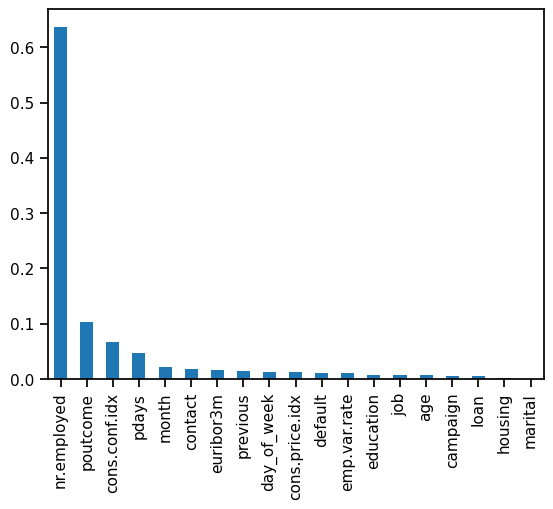

In [ ]:
feature_importances = pd.Series(clf2_xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

## Models Comparison

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Initialize classifiers in consideration
models = []
models.append(("Decision Tree", dtc_model))
models.append(('Logistic Regression', model_LR))
models.append(('KNN', knn_31))
models.append(('SVM',svm_model))
models.append(('Random Forest', Classif_RF_random_best))
models.append(('XGBoost', clf2_xgb))


#Evaluating Model Results:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'AUC Mean', 'AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)

# Evaluate each model using k-fold cross-validation:
i = 0
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1

model_results.sort_values(by=['AUC Mean'], ascending=True)

,Algorithm,AUC Mean,AUC STD,Accuracy Mean,Accuracy STD
2,KNN,76.80,1.49,89.63,0.70
1,Logistic Regression,77.08,2.24,89.76,0.67
0,Decision Tree,77.87,1.60,89.86,0.57
3,SVM,77.90,1.41,89.77,0.68
5,XGBoost,79.18,1.94,89.82,0.67
4,Random Forest,79.73,1.84,89.91,0.68


Based on the metrics shown in the table, the Random Forest model has the highest AUC Mean and Accuracy Mean, with 79.73% and 89.91%, respectively. Therefore, the Random Forest model appears to be the best model for this particular classification task.

## best_model Prediction

In [ ]:
# select the best model based on the AUC mean on the validation set
# Decide to use Random Forest
best_model = Classif_RF_random_best

# fit the best model on the training set
best_model.fit(X_train, y_train)

# evaluate the best model on the test set
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:,1]

# calculate the accuracy and AUC on the test set
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print('Accuracy on the test set:', round(acc*100, 2))
print('AUC on the test set:', round(auc*100, 2))

Accuracy on the test set: 90.5
AUC on the test set: 80.16


## Business Simulation

* When it comes to the primary goal, we can focus on the classification modeling which is to predict if the client will subscribe (yes/no) a term deposit (variable y). By using this model, we decide to know the maximum profit of the marketing campaigns in the real case.
* The profit if the customer decides to subscribe a term deposit after a phone call : 175 dollars
* The mandatory cost for the whole process of marketing campaign for each customer: 30 dollars
* It is important to check the number of employees since it significantly affect the result.

In [ ]:
## Find out the maximum and minimum of number of employess

In [ ]:
bank_data['nr.employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

In [ ]:
# Case 1 - When the the number of employees are highest - 5228.1

In [ ]:
# load the data
case1_data = pd.DataFrame({'age': [30], 'job': [1], 'marital': [0], 'education': [3], 'default': [0],
                         'housing': [1], 'loan': [0], 'contact': [0], 'month': [5], 'day_of_week': [1],
                         'campaign': [2], 'pdays': [999], 'previous': [0], 'poutcome': [0],
                         'emp.var.rate': [1.1], 'cons.price.idx': [93.994], 'cons.conf.idx': [-36.4],
                         'euribor3m': [4.857], 'nr.employed': [5228.1]})

# make prediction
y_pred = best_model.predict(case1_data)

# calculate the expected value
if y_pred == 1:
    expected_value = 175 - 30
else:
    expected_value = 0 - 30

print(f"Expected value per customer: {expected_value}")


Expected value per customer: -30


In [ ]:
# Define the input data as a DataFrame
case1_data = pd.DataFrame({'age': [30], 'job': [1], 'marital': [0], 'education': [3], 'default': [0],
                         'housing': [1], 'loan': [0], 'contact': [0], 'month': [5], 'day_of_week': [1],
                         'campaign': [2], 'pdays': [999], 'previous': [0], 'poutcome': [1],
                         'emp.var.rate': [1.1], 'cons.price.idx': [93.994], 'cons.conf.idx': [-36.4],
                         'euribor3m': [4.857], 'nr.employed': [5228.1]})

# Make a prediction on the input data
prediction = best_model.predict_proba(case1_data)[:,1]

# Print the predicted probability of success
print('The predicted probability of success is:', round(prediction[0], 4))


The predicted probability of success is: 0.0506


Based on the predicted probability of success of 0.0506, it may not be the best decision to conduct this marketing campaign when the number of employees is high.

In [ ]:
# Case 2 - When the the number of employees are lowest  - 4963.6

In [ ]:
# load the data
case2_data = pd.DataFrame({'age': [30], 'job': [1], 'marital': [0], 'education': [3], 'default': [0],
                         'housing': [1], 'loan': [0], 'contact': [0], 'month': [5], 'day_of_week': [1],
                         'campaign': [2], 'pdays': [999], 'previous': [0], 'poutcome': [0],
                         'emp.var.rate': [1.1], 'cons.price.idx': [93.994], 'cons.conf.idx': [-36.4],
                         'euribor3m': [4.857], 'nr.employed': [4963.6]})

# make prediction
y_pred = best_model.predict(case2_data)

# calculate the expected value
if y_pred == 1:
    expected_value = 175 - 30
else:
    expected_value = 0 - 30

print(f"Expected value per customer: {expected_value}")


Expected value per customer: -30


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Define the input data as a DataFrame
case2_data = pd.DataFrame({'age': [30], 'job': [1], 'marital': [0], 'education': [3], 'default': [0],
                         'housing': [1], 'loan': [0], 'contact': [0], 'month': [5], 'day_of_week': [1],
                         'campaign': [2], 'pdays': [999], 'previous': [0], 'poutcome': [0],
                         'emp.var.rate': [1.1], 'cons.price.idx': [93.994], 'cons.conf.idx': [-36.4],
                         'euribor3m': [4.857], 'nr.employed': [4963.6]})

# Make a prediction on the input data
prediction = best_model.predict_proba(case2_data)[:,1]

# Print the predicted probability of success
print('The predicted probability of success is:', round(prediction[0], 4))

The predicted probability of success is: 0.3711


Regarding the result, the predicted probability of success is higher when the number of employees is lower, but it remains below 0.5. This suggests that we need to investigate the performance of our model on the test dataset to determine if this marketing strategy is viable.

In [ ]:
# predict probabilities of y=1 for test set
y_pred_prob = best_model.predict_proba(X_test)[:, 1]
print('The predicted probability of success is:', round(y_pred_prob[0], 4))

# set a threshold to decide which customers to call
threshold = 0.5
to_call = y_pred_prob >= threshold

# calculate the net profit for each customer
net_profit = np.zeros_like(y_test)
net_profit[(y_test == 1) & to_call] = 145 # profit of 70 for true positives that are called
net_profit[to_call & (y_test == 0)] = -30  # cost of 30 for false positives that are called

# calculate the expected value
expected_value = np.mean(net_profit * y_pred_prob)

print(f"Expected value per customer: {expected_value:.2f}")

The predicted probability of success is: 0.0524
Expected value per customer: 2.50


This code computes the expected value of a telemarketing campaign based on the predicted probability of success for each customer.

First, it uses the trained model best_model to predict the probability of success for each customer in the test set, and selects the probability for class 1 using best_model.predict_proba(X_test)[:, 1].

Next, it sets a threshold of 0.5 to decide which customers to call. If the predicted probability of success is greater than or equal to 0.5, the customer is considered to be a positive and is selected for a call, otherwise, the customer is considered to be a negative and not selected for a call. This is done using the to_call variable.

Then, it calculates the net profit for each customer. For a true positive that is called, the profit is 145, and for a false positive that is called, the cost is -30. If a customer is not called, the net profit for that customer is 0. This is done using the net_profit variable.

Finally, it calculates the expected value of the telemarketing campaign by taking the mean of the product of net_profit and y_pred_prob. This value represents the expected profit per customer if the campaign were repeated many times. It is printed out at the end of the code using the print function.

The expected value per customer of 2.50 represents the average profit that can be gained per customer if we use the model to decide whether or not to offer them a term deposit. In this case, we can expect to make a profit of $2.50 per customer if we offer them a term deposit based on the predicted probability of success from the model, taking into account the cost of the marketing campaign and the potential profit from the customer subscribing to the term deposit.

Based on the predicted probability of success and the expected value per customer, it may not be profitable to conduct this marketing campaign. The predicted probability of success is relatively low at 0.0524, which means that the likelihood of a customer subscribing to the term deposit after a phone call is not very high. Additionally, the expected value per customer is only 2.5, which is barely above the cost of the marketing campaign itself (30 dollars). Therefore, it may be more effective to consider alternative marketing strategies or to improve the current campaign to increase the likelihood of success and the expected value per customer.